# $\Lambda CDM$ Model

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.interpolate
from classy import Class

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 5, 3
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [2]:
cosmo_lcdm = Class() #esta linea es la comunicacion con CLASS
cosmo_lcdm.set({'output': 'tCl, pCl, lCl','lensing':'yes'})
cosmo_lcdm.compute()
l = np.array(range(2,2501))
factor = l*(l+1)/(2*np.pi)
lensed_cl = cosmo_lcdm.lensed_cl(2500)
lensed_cl.viewkeys()

AttributeError: 'dict' object has no attribute 'viewkeys'

Text(0, 0.5, '$\\ell(\\ell+1)/(2\\pi) C_\\ell$')

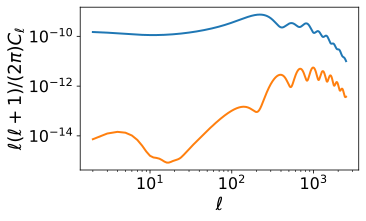

In [3]:
plt.loglog(l, factor*lensed_cl['tt'][2:],l,factor*lensed_cl['ee'][2:])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/(2\pi) C_\ell$")

# Plotting background quantities

In [4]:
cosmo1=Class()
cosmo2=Class()
cosmo1.set({'omega_b':'0.03','omega_cdm':'0.95'}) #LCDM
cosmo2.set({'omega_b':'0.03','omega_cdm':'0.25'}) #Einstein-DeSitter
cosmo1.compute()
cosmo2.compute()

In [5]:
background1 = cosmo1.get_background()
background2 = cosmo2.get_background()

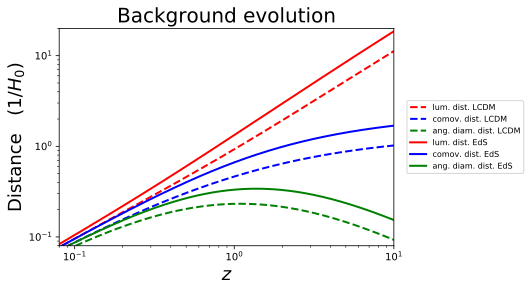

In [6]:
Hubble1_z=np.vectorize(cosmo1.Hubble)
Hubble1_z(background1['z'])
H01 = Hubble1_z(0)

Hubble2_z=np.vectorize(cosmo2.Hubble)
Hubble2_z(background2['z'])
H02 = Hubble2_z(0)

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 5, 3
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 8

%matplotlib inline

plt.loglog(background1['z'],background1['lum. dist.']*H01,ls='--',color='red', label='lum. dist. LCDM')
plt.loglog(background1['z'],background1['comov. dist.']*H01,ls='--',color='blue', label = 'comov. dist. LCDM')
plt.loglog(background1['z'],background1['ang.diam.dist.']*H01,ls='--',color='green', label = 'ang. diam. dist. LCDM')

plt.loglog(background2['z'],background2['lum. dist.']*H02,color='red', label = 'lum. dist. EdS')
plt.loglog(background2['z'],background2['comov. dist.']*H02,color='blue',label = 'comov. dist. EdS')
plt.loglog(background2['z'],background2['ang.diam.dist.']*H02,color='green',label = 'ang. diam. dist. EdS')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.xlabel(r'$z$')
plt.ylabel(r'$\mathrm{Distance}\quad (1/H_0)$')

plt.xlim([0.08,10])
plt.ylim([0.08,20])

plt.title('Background evolution')
plt.savefig('Background evolution',bbox_inches='tight', dpi = 600)

# Plotting power spectra

Text(0.5, 1.0, 'CMB Temperature Power Spectrum')

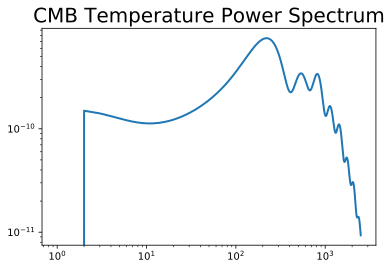

In [7]:
cosmo3=Class()
cosmo3.set({'output':'tCl,pCl,lCl'})
cosmo3.compute()
cl = cosmo3.raw_cl()
l = cl['ell']
plt.loglog(l,l*(l+1)/(2.*np.pi)*cl['tt'])
plt.title('CMB Temperature Power Spectrum')

In [8]:
#create  instance  of  the  class  "Class"
LambdaCDM = Class()
# pass  input  parameters
LambdaCDM.set({'z_pk':'0,2','omega_b':'0.022032' ,'omega_cdm':'0.12038','h':'0.67556' ,'A_s':'2.215e-9','n_s':'0.9619' ,'tau_reio':'0.0925'})
LambdaCDM.set({'output':'tCl ,pCl ,lCl ,mPk','lensing':'yes','modes':'s','P_k_max_1/Mpc':3.0})
# run  class
LambdaCDM.compute ()

In [9]:
# get  all  C_l  output
cls = LambdaCDM.lensed_cl (2500)
# To  check  the  format  of  cls
cls.viewkeys()

AttributeError: 'dict' object has no attribute 'viewkeys'

In [10]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

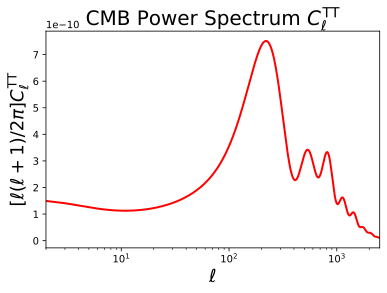

In [11]:
# plot  C_l^TT
plt.xscale('log');plt.yscale('linear');plt.xlim (2 ,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1) /2\pi]   C_\ell^\ mathrm{TT}$')
plt.plot(ll ,clTT*ll*(ll+1)/(2.*np.pi),'r-')
plt.title('CMB Power Spectrum $ C_\ell^\ mathrm{TT}$')
plt.savefig('CMB Power Spectrum $ C_\ell^\ mathrm{TT}$',dpi=600)

In [12]:
# get P(k) at  redhsift  z=0
kk = np.logspace(-4,np.log10(3),1000)
# k in h/Mpc
Pk = []
#Pk2 = []
# P(k) in (Mpc/h)**3
h = LambdaCDM.h()
# get  reduced  Hubble  for  conversions  to 1/ Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3)
 #   Pk2.append(LambdaCDM.pk(k*h,2.)*h**3)
#  function  .pk(k,z)
LambdaCDM.struct_cleanup()
LambdaCDM.empty()

In [13]:
#create  instance  of  the  class  "Class"
LambdaCDM = Class()
# pass  input  parameters
LambdaCDM.set({'z_pk':'0,2','omega_b':'0.022032' ,'omega_cdm':'0.12038','h':'0.67556' ,'A_s':'2.215e-9','n_s':'0.9619' ,'tau_reio':'0.0925'})
LambdaCDM.set({'output':'tCl ,pCl ,lCl ,mPk','lensing':'yes','modes':'s','P_k_max_1/Mpc':3.0})
# run  class
LambdaCDM.compute ()
# get P(k) at  redhsift  z=2
kk = np.logspace(-4,np.log10(3),1000)
# k in h/Mpc
Pk2 = []
# P(k) in (Mpc/h)**3
h = LambdaCDM.h()
# get  reduced  Hubble  for  conversions  to 1/ Mpc
for k in kk:
    Pk2.append(LambdaCDM.pk(k*h,2.)*h**3)
#  function  .pk(k,z)

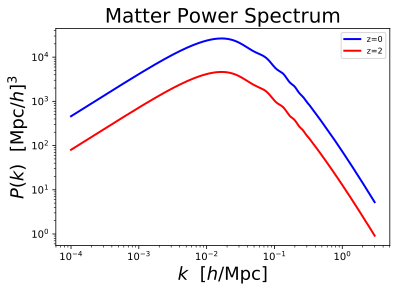

In [14]:
# plot P(k)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.loglog(kk ,Pk,'b-', label='z=0')
plt.loglog(kk ,Pk2,'r-',label='z=2')
plt.legend()
plt.title('Matter Power Spectrum')
plt.savefig('Matter Power Spectrum',dpi=600)

In [15]:
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [16]:
# scalars  only
M = Class()
M.set({'output':'tCl ,pCl','modes':'s','lensing':'no','n_s':'0.9619','l_max_scalars':'3000'})
M.compute()
cls = M.raw_cl(3000)
#l=cls['ell']
#plt.loglog(l,l*(l+1)/(2.*np.pi)*cls['tt'])
M.struct_cleanup()
M.empty()

In [17]:
# tensors  only
M=Class()
l_max_tensors = 600
M.set({'output':'tCl ,pCl','modes':'t','lensing':'no','r':'0.1','n_t':'0','l_max_tensors':l_max_tensors})
M.compute()
clt = M.raw_cl(l_max_tensors)
M.struct_cleanup()
M.empty()
#plt.loglog(l,l*(l+1)/(2.*np.pi)*clt(['tt'])

In [18]:
# scalars + tensors (only in this  case we can get  the correct  lensed  ClBB)
M=Class()
M.set({'output':'tCl ,pCl ,lCl','modes':'s,t','lensing':'yes','r':'0.1','n_s':'0.9619' ,'n_t':'0','l_max_scalars':'3000','l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(3000)
#plt.loglog(l,l*(l+1)/(2.*np.pi)*cl_tot['tt'])
cl_lensed = M.lensed_cl(3000)
#plt.loglog(l,l*(l+1)/(2.*np.pi)*cl_lensed['tt'])
M.struct_cleanup()
M.empty()

In [19]:
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 5, 3
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 10

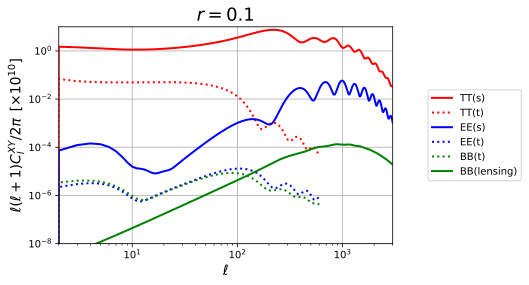

In [20]:
%matplotlib inline
plt.xlim([2,3000])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()
#
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
factort = 1.e10*ellt*(ellt+1.)/2./math.pi
#
plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ellt,factort*clt['tt'],'r:',label=r'$\mathrm{TT(t)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
plt.loglog(ellt,factort*clt['ee'],'b:',label=r'$\mathrm{EE(t)}$')
plt.loglog(ellt,factort*clt['bb'],'g:',label=r'$\mathrm{BB(t)}$')
plt.loglog(ell,factor*(cl_lensed['bb']-cl_tot['bb']),'g-',label=r'$\mathrm{BB(lensing)}$')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.savefig('cl_ST',bbox_inches='tight',dpi=600)

In [21]:
M = Class()
M.set({'h':0.67556,'omega_b':0.022032,'omega_cdm':0.12038,'A_s':2.215e-9,'tau_reio':0.0925,'YHe':0.246,'l_max_scalars':5000})
M.set({'output':'tCl ,pCl ,lCl ,mPk','lensing':'yes','modes':'s','P_k_max_1/Mpc':3.0})
M.compute()
cl_tot = M.raw_cl (3000)
cl_lensed = M.lensed_cl (3000)
M.struct_cleanup()   # clean  output
M.empty()             # clean  input

M = Class()
M.set({'h':0.67556,'omega_b':0.022032,'omega_cdm':0.12038,'A_s':2.215e-9,'tau_reio':0.0925,'YHe':0.246,'l_max_scalars':5000})
M.set({'output':'tCl ,pCl ,lCl ,mPk','lensing':'yes','modes':'s','P_k_max_1/Mpc':3.0})
M.set({'temperature contributions':'tsw'})
M.compute()
cl_tsw = M.raw_cl (3000)
M.struct_cleanup()
M.empty()

M = Class()
M.set({'h':0.67556,'omega_b':0.022032,'omega_cdm':0.12038,'A_s':2.215e-9,'tau_reio':0.0925,'YHe':0.246,'l_max_scalars':5000})
M.set({'output':'tCl ,pCl ,lCl ,mPk','lensing':'yes','modes':'s','P_k_max_1/Mpc':3.0})
M.set({'temperature contributions':'eisw'})
M.compute()
cl_eisw = M.raw_cl (3000)
M.struct_cleanup()
M.empty()

M = Class()
M.set({'h':0.67556,'omega_b':0.022032,'omega_cdm':0.12038,'A_s':2.215e-9,'tau_reio':0.0925,'YHe':0.246,'l_max_scalars':5000})
M.set({'output':'tCl ,pCl ,lCl ,mPk','lensing':'yes','modes':'s','P_k_max_1/Mpc':3.0})
M.set({'temperature contributions':'lisw'})
M.compute()
cl_lisw = M.raw_cl (3000)
M.struct_cleanup()
M.empty()
       
M = Class()
M.set({'h':0.67556,'omega_b':0.022032,'omega_cdm':0.12038,'A_s':2.215e-9,'tau_reio':0.0925,'YHe':0.246,'l_max_scalars':5000})
M.set({'output':'tCl ,pCl ,lCl ,mPk','lensing':'yes','modes':'s','P_k_max_1/Mpc':3.0})
M.set({'temperature contributions':'dop'})
M.compute()
cl_dop = M.raw_cl (3000)
M.struct_cleanup()
M.empty()

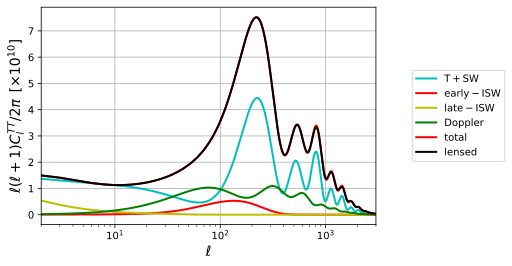

In [22]:
plt.xlim([2,3000])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
#
ell = cl_tot['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
plt.semilogx(ell,factor*cl_tsw['tt'],'c-',label=r'$\mathrm{T+SW}$')
plt.semilogx(ell,factor*cl_eisw['tt'],'r-',label=r'$\mathrm{early-ISW}$')
plt.semilogx(ell,factor*cl_lisw['tt'],'y-',label=r'$\mathrm{late-ISW}$')
plt.semilogx(ell,factor*cl_dop['tt'],'g-',label=r'$\mathrm{Doppler}$')
plt.semilogx(ell,factor*cl_tot['tt'],'r-',label=r'$\mathrm{total}$')
plt.semilogx(ell,factor*cl_lensed['tt'],'k-',label=r'$\mathrm{lensed}$')
#
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.savefig('cltt_terms',bbox_inches='tight',dpi=600)

In [3]:
cosmo_lcdm.age()

13.795359342143062

In [4]:
cosmo_lcdm.empty()

In [5]:
cosmo_lcdm.get_background()

{'z': array([1.00000000e+14, 9.93048659e+13, 9.86145640e+13, ...,
        1.37685206e-02, 6.68404613e-03, 0.00000000e+00]),
 'proper time [Gyr]': array([7.55850363e-26, 7.66469305e-26, 7.77237432e-26, ...,
        1.35980751e+01, 1.36990895e+01, 1.37953593e+01]),
 'conf. time [Mpc]': array([4.63478500e-09, 4.66752681e-09, 4.70026862e-09, ...,
        1.41041433e+04, 1.41354310e+04, 1.41650454e+04]),
 'H [1/Mpc]': array([2.15754595e+22, 2.12765453e+22, 2.09817724e+22, ...,
        2.26810692e-04, 2.26051453e-04, 2.25342560e-04]),
 'comov. dist.': array([14165.04541243, 14165.04541243, 14165.04541243, ...,
           60.90213826,    29.61446144,     0.        ]),
 'ang.diam.dist.': array([1.41650454e-10, 1.42642007e-10, 1.43640501e-10, ...,
        6.00749945e+01, 2.94178313e+01, 0.00000000e+00]),
 'lum. dist.': array([1.41650454e+18, 1.40665794e+18, 1.39687978e+18, ...,
        6.17406706e+01, 2.98124059e+01, 0.00000000e+00]),
 'comov.snd.hrz.': array([2.67595816e-09, 2.69468987e-09, 2.